# **White Wine Quality Data Set Anaylsis**

**Importing Libraries**

In [ ]:
# Init
!test -e ds-assets && cd ds-assets && git pull && cd ..
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
home = "ds-assets/assets/"
import sys
sys.path.append(home)

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Evaluation metrics
from sklearn.metrics import accuracy_score

Already up to date.


**Importing Data Set**

In [ ]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/winequality-white.csv'
df = pd.read_csv(url)

# Finding dataset size
num_rows, num_columns = df.shape

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 4898
Number of Columns: 12


The dataset includes the following features:
1.   **Fixed Acidity:** Concentration of non-volatile acids (tartaric acid, for example).
2.   **Volatile Acidity:** Amount of acetic acid in the wine, which can affect the aroma.
3.   **Citric Acid:** Small amounts of citric acid can add freshness and flavor.
4.   **Residual Sugar:** Sugar remaining after fermentation stops.
5.   **Chlorides:** Concentration of salt in the wine.
6.   **Free Sulfur Dioxide:** The amount of SO2 that is not bound and can act as an antimicrobial agent.
7.   **Total Sulfur Dioxide:** Total SO2 present, free and bound.
8.   **Density:** The density of the wine, typically close to water density.
9.   **pH:** Measure of how acidic or basic the wine is.
10.  **Sulphates:** A wine additive that can contribute to SO2 levels and acts as an antioxidant.
11.  **Alcohol:** Alcohol content in the wine (% by volume).

Target:
*   **Quality:** The quality rating of the wine ranging from 1 to 9.

**Data Cleaning and Preprocessing**

In [ ]:
# Checking if any values are null
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Loop over the columns and check for non-numeric values
for column in df.columns:
    # Ignore non-numeric columns
    if df[column].dtype != 'object':
        non_numeric = pd.to_numeric(df[column], errors='coerce').isnull().sum()
        if non_numeric > 0:
            print(f"Column '{column}' contains {non_numeric} non-numeric values.")

# Check if the target values fall within expected range
if df['quality'].min() < 1 or df['quality'].max() > 9:
    print("Warning: Some values in 'quality' are outside the expected range (1-9).")

**Data Set Value Analysis**

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The dataset contains 4,898 samples with 12 features describing the physicochemical properties and quality of wine. Below is a concise analysis of each attribute:


1.   **Fixed Acidity:**
    *   Mean: 6.85, Standard Deviation: 0.84
    *   Range: 3.80 (min) to 14.20 (max).
    *   Most values lie between 6.30 (25th percentile) and 7.30 (75th percentile).
2.   **Volatile Acidity:**
    *   Mean: 0.28, Standard Deviation: 0.10
    *   Range: 0.08 (min) to 1.10 (max).
    *   Typically between 0.21 and 0.32, indicating a low level of acidity.
3.   **Citric Acid:**
    *   Mean: 0.33, Standard Deviation: 0.12
    *   Range: 0.00 (min) to 1.66 (max).
    *   Most samples have citric acid levels between 0.27 and 0.39.
4.   **Residual Sugar:**
    *   Mean: 6.39, Standard Deviation: 5.07
    *   Range: 0.60 (min) to 65.80 (max).
    *   The distribution is skewed, with most values between 1.70 and 9.90.
5.   **Chlorides:**
    *   Mean: 0.045, Standard Deviation: 0.022
    *   Range: 0.009 (min) to 0.346 (max).
    *   Typical chloride content ranges from 0.036 to 0.050.
6.   **Free Sulfur Dioxide:**
    *   Mean: 35.31, Standard Deviation: 17.01
    *   Range: 2.00 (min) to 289.00 (max).
    *   Concentrations are generally between 23.00 and 46.00.
7.   **Total Sulfur Dioxide:**
    *   Mean: 138.36, Standard Deviation: 42.50
    *   Range: 9.00 (min) to 440.00 (max).
    *   Most values lie between 108.00 and 167.00.
8.   **Density:**
    *   Mean: 0.994, Standard Deviation: 0.003
    *   Range: 0.987 (min) to 1.039 (max).
    *   Densities cluster tightly, reflecting consistency in wine composition.
9.   **pH:**
    *   Mean: 3.19, Standard Deviation: 0.15
    *   Range: 2.72 (min) to 3.82 (max).
    *   Most wines have a pH between 3.09 and 3.28, indicating mild acidity.
10.   **Sulphates:**
    *   Mean: 0.49, Standard Deviation: 0.11
    *   Range: 0.22 (min) to 1.08 (max).
    *   Concentrations typically range from 0.41 to 0.55.
11.   **Alcohol:**
    *   Mean: 10.51, Standard Deviation: 1.23
    *   Range: 8.00 (min) to 14.20 (max).
    *   Alcohol levels are concentrated between 9.50 and 11.40.
12.   **Quality:**
    *   Mean: 5.88, Standard Deviation: 0.89
    *   Range: 3.00 (min) to 9.00 (max).
    *   The majority of samples fall within a quality rating of 5 to 6.

**Insights:**
*   The dataset exhibits a diverse range in attributes like residual sugar, sulfur dioxide levels, and alcohol content.
*   Quality scores (3 to 9) are slightly skewed, with most samples rated around 5 or 6, which suggests room for exploring relationships between physicochemical properties and quality ratings.
*   Features like pH, density, and chlorides are tightly distributed, indicating standardization in these wine production aspects.



# **Data exploratory analysis by use of visualization**

**Histogram and Outlier Detection**

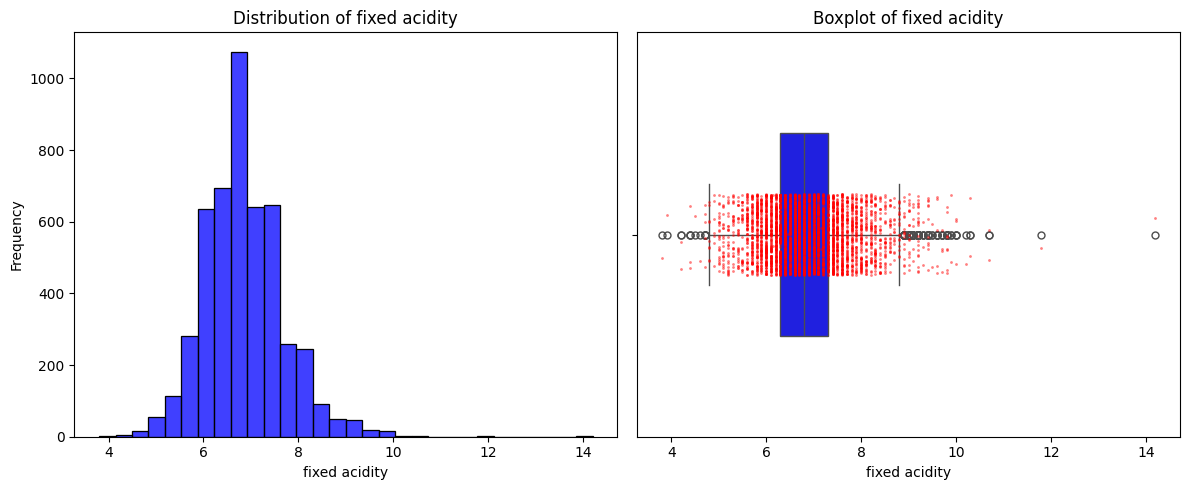

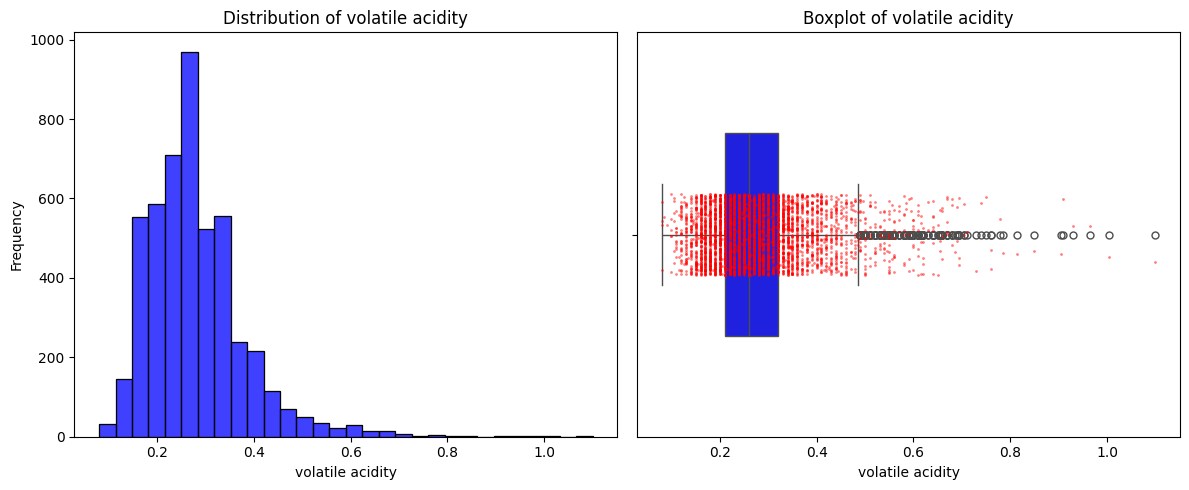

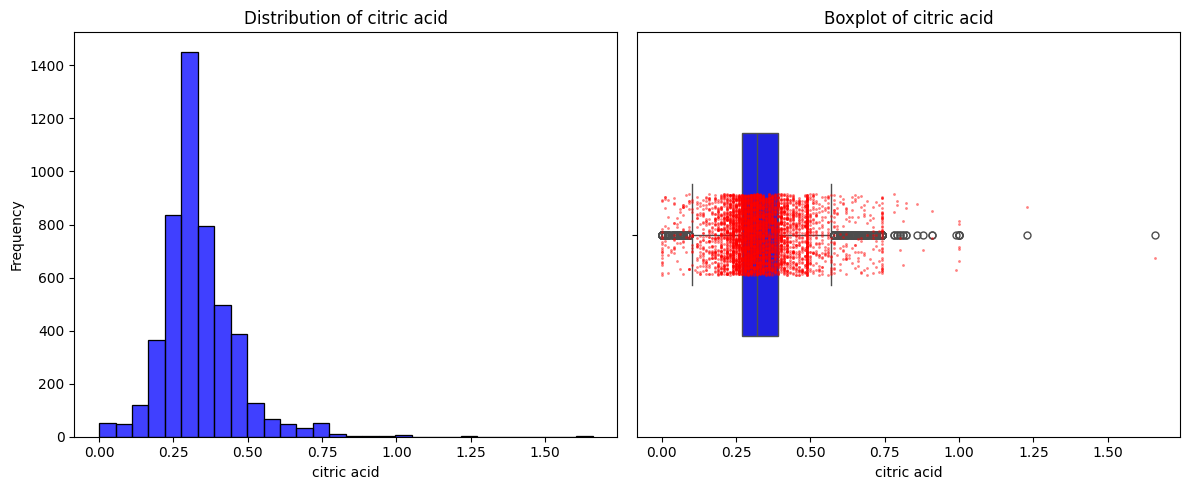

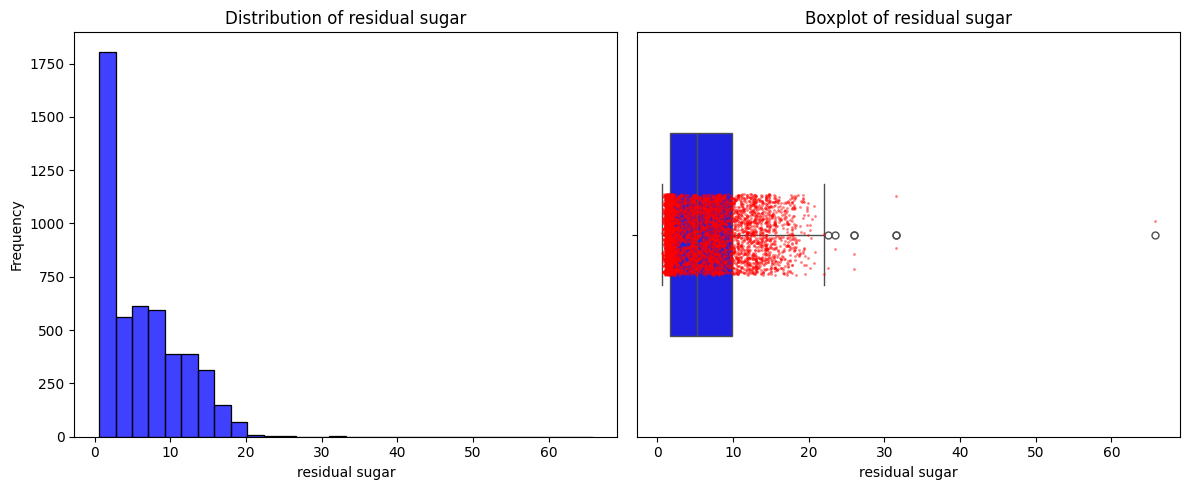

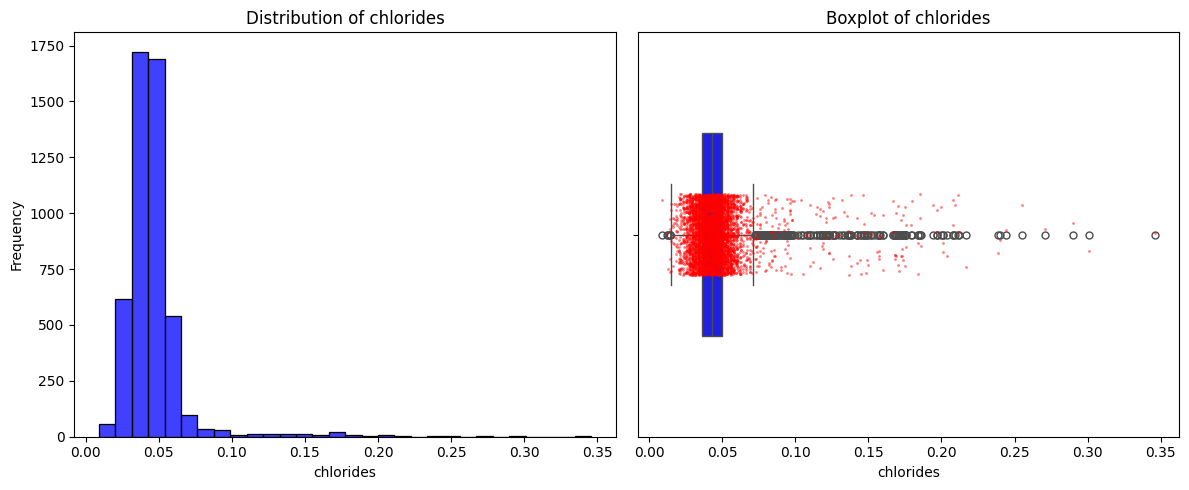

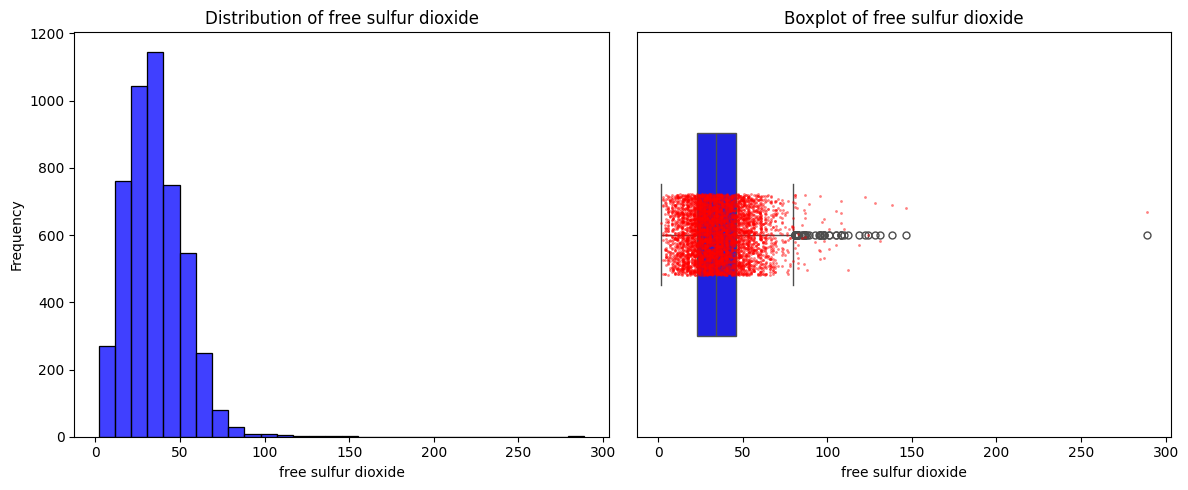

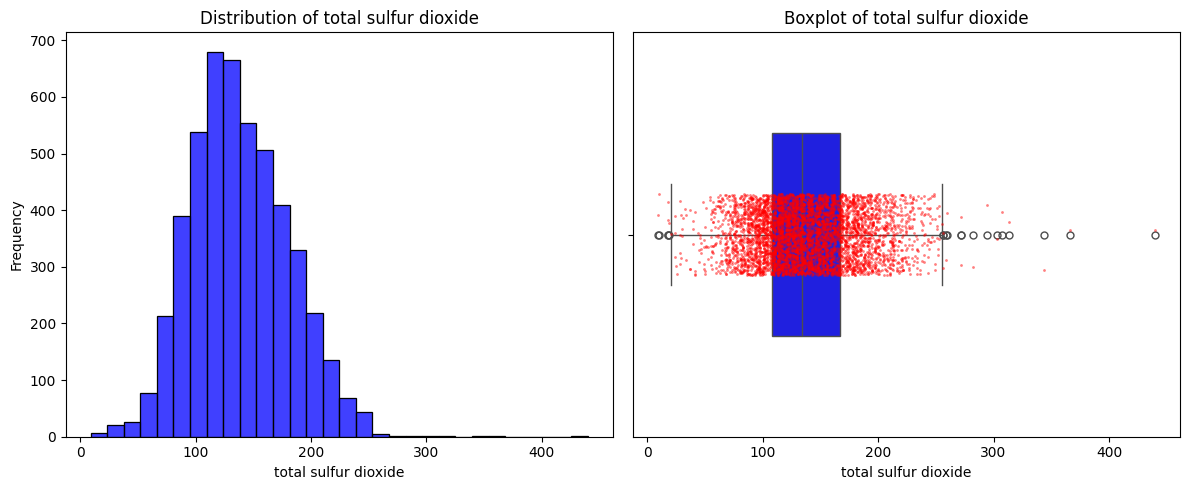

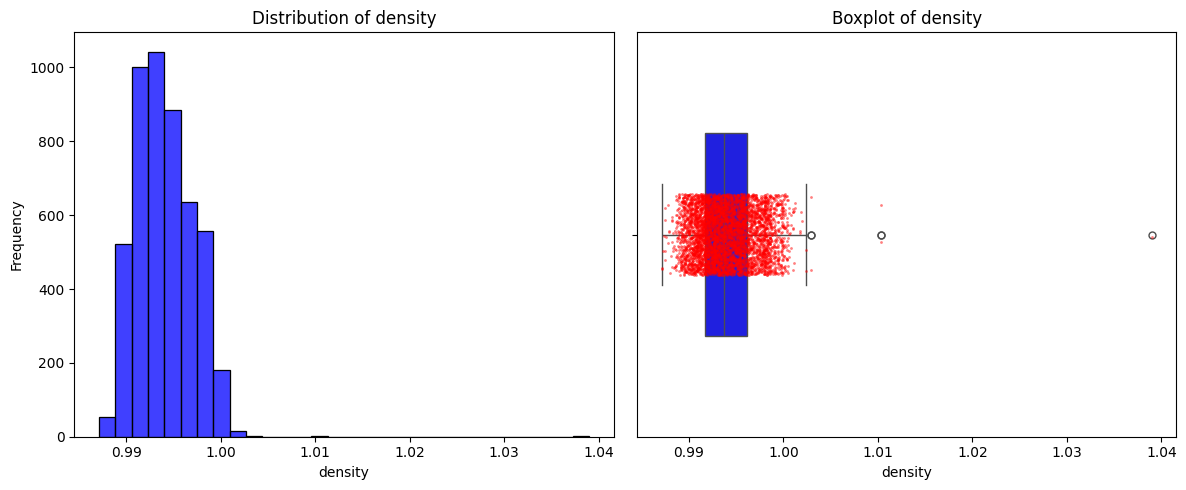

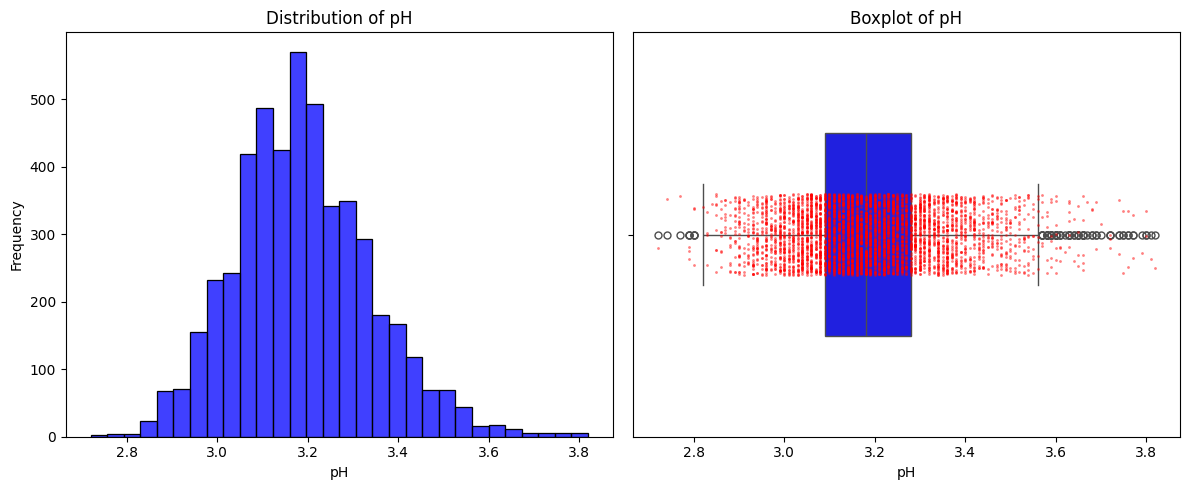

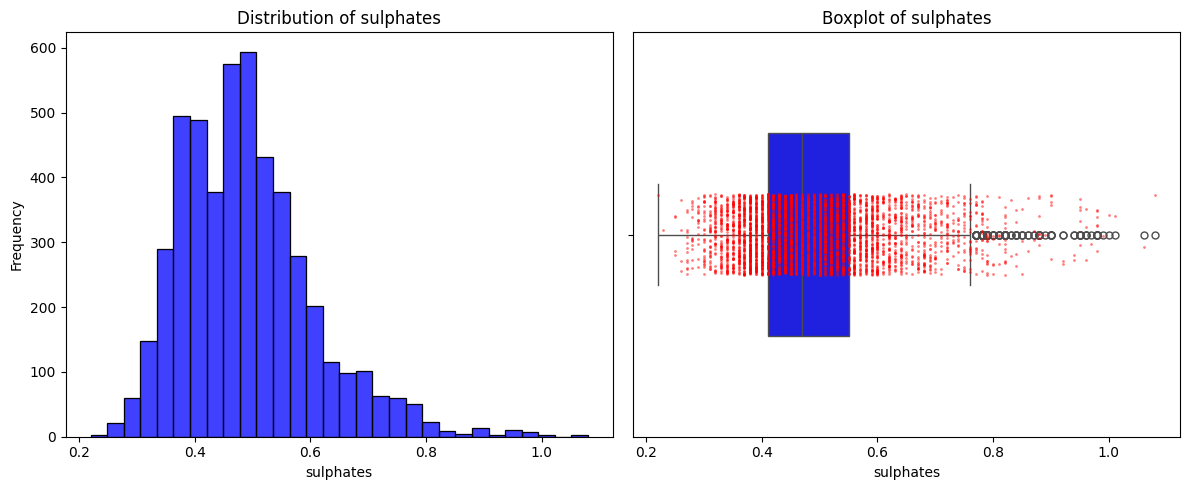

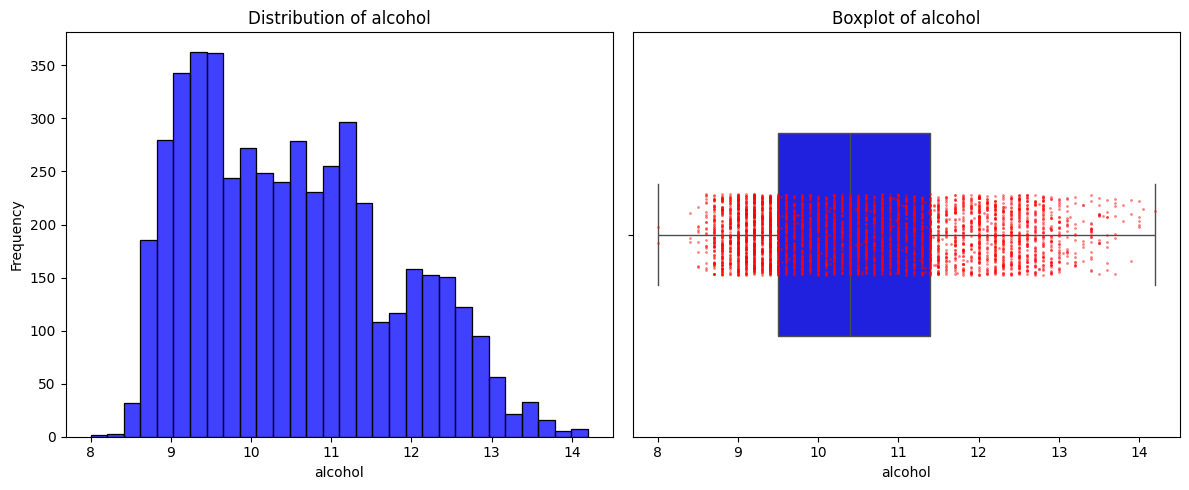

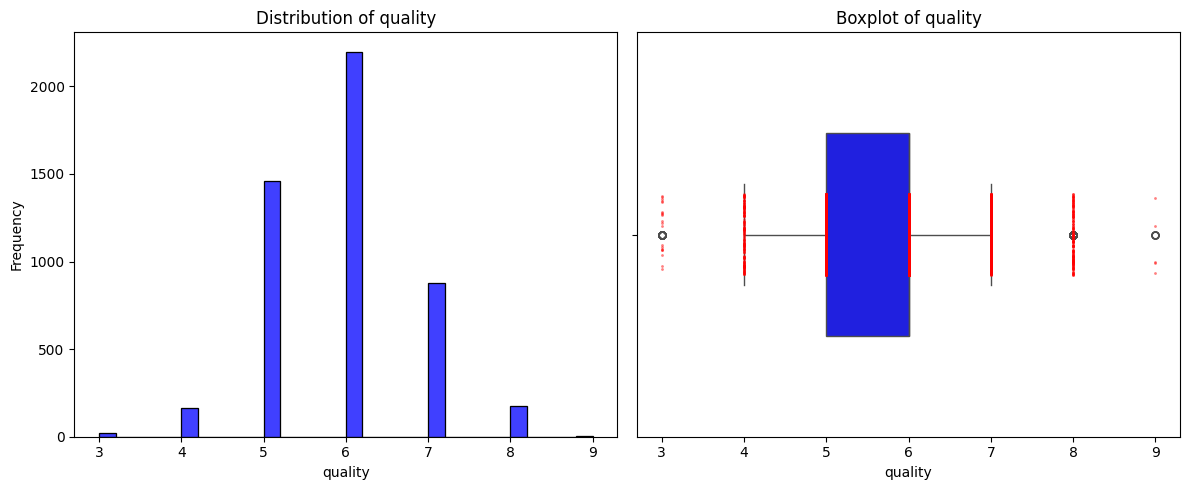

In [ ]:
# Create a list of columns to visualize (excluding non-numeric or unnecessary columns)
columns = df.columns

# Loop through each column to plot
for column in columns:
    # Set figure size
    plt.figure(figsize=(12, 5))

    # Bar plot for distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, kde=False, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box plot with black outliers and red data points
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=column, color='blue', width=0.5, flierprops={'marker': 'o', 'color': 'black', 'markersize': 5})
    sns.stripplot(data=df, x=column, color='red', alpha=0.5, jitter=True, size=2)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

    # Display the plots
    plt.tight_layout()
    plt.show()

**Correlation of Dataset Features**

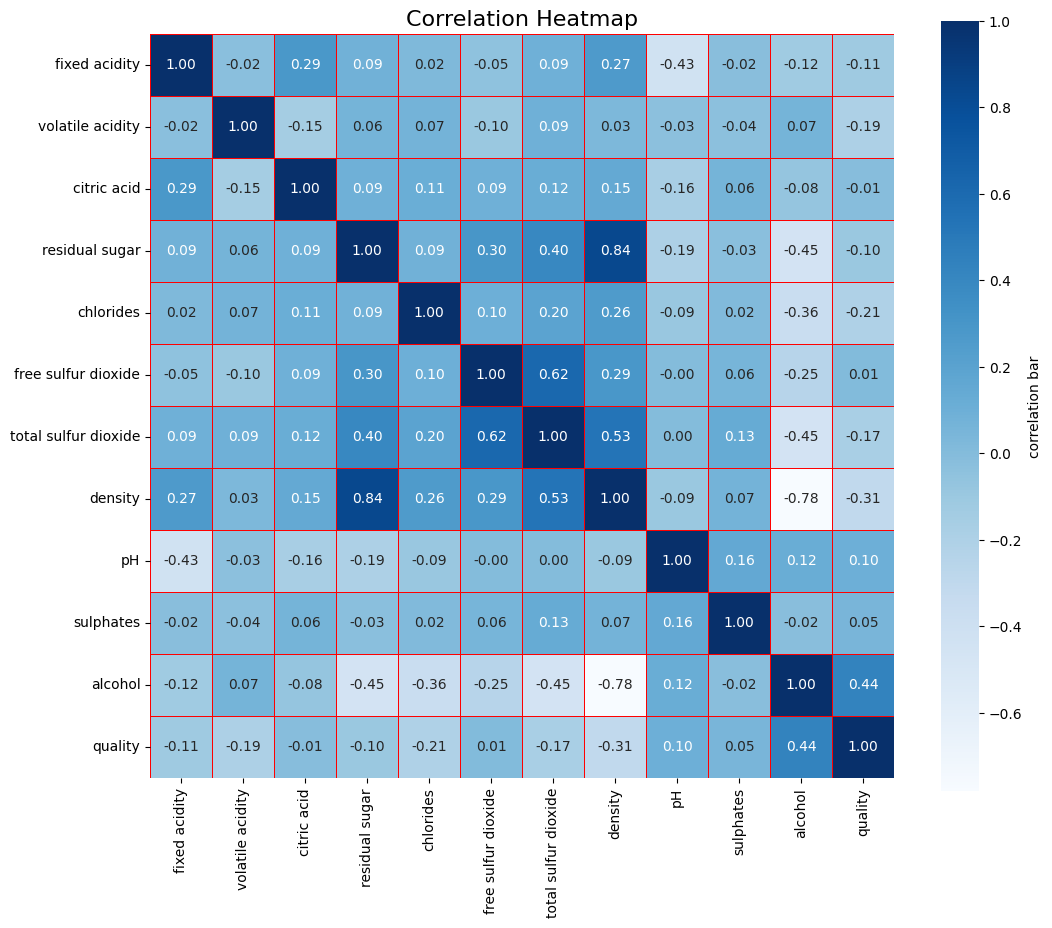

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    square=True,
    linewidths=0.5,
    linecolor="red",
    cbar_kws={'label': 'correlation bar'}
)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

# Show the plot
plt.show()

**Count Plot of Target Variable**

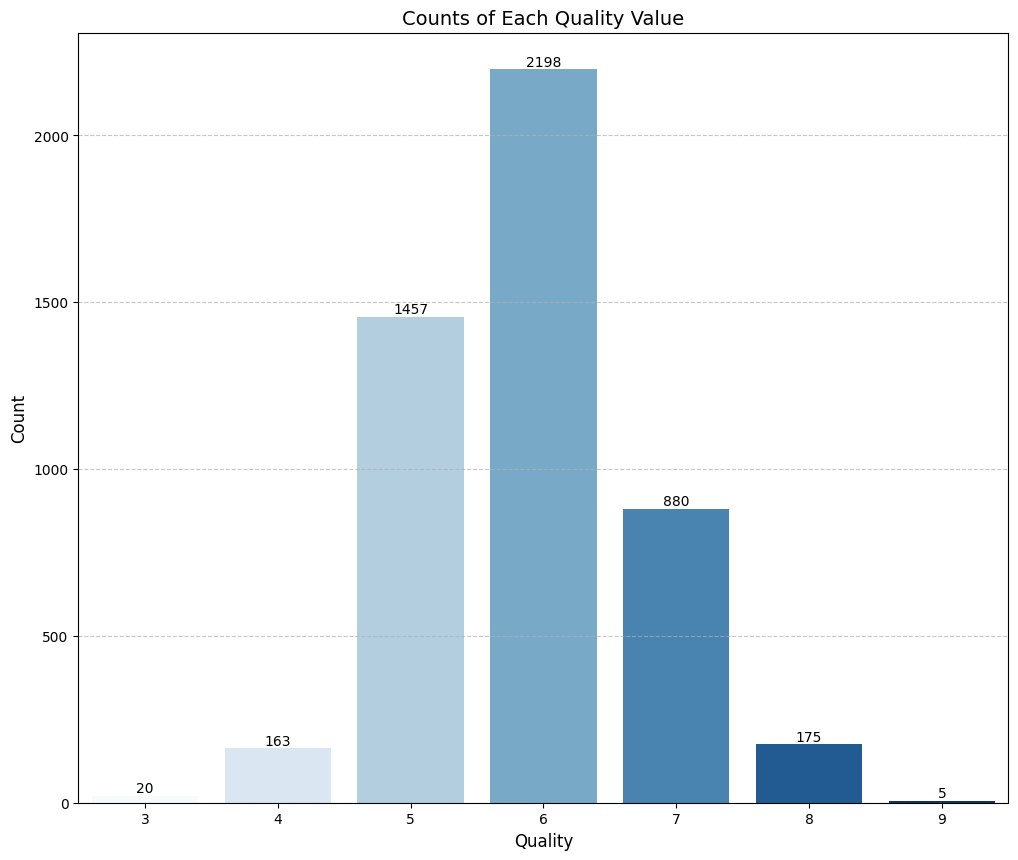

In [ ]:
# Count the occurrences of each unique value in 'quality'
quality_counts = df['quality'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(12, 10))
sns.barplot(
    x=quality_counts.index,
    y=quality_counts.values,
    palette="Blues",
    hue=quality_counts.index,
    dodge=False,
    legend=False
)

# Add annotations (counts) on top of each bar
for index, value in enumerate(quality_counts.values):
    plt.text(index, value + 10, str(value), ha='center', fontsize=10, color='black')

# Add titles and labels
plt.title('Counts of Each Quality Value', fontsize=14)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# **Medium Complexity Decision Tree of Data Set**

**Search for Best Medium Complexity Model**

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for tuning medium complexity
param_grid = {
    # Criterion for the split (impurity measure)
    'criterion': ['gini', 'entropy'],
    # Depth of the tree, control overfitting
    'max_depth': list(range(1,25)),
    # Minimum samples required to split a node
    'min_samples_split': [2, 10, 20],
    # Minimum samples required to be a leaf node
    'min_samples_leaf': [1, 5, 10],
    # Number of features to consider for splitting
    'max_features': [None, 'sqrt', 'log2']
}

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Get the best decision tree model
best_dt = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the test accuracy
print(f"Test accuracy of the best medium-complexity Decision Tree: {test_accuracy:.2f}")

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters: {'criterion': 'gini', 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test accuracy of the best medium-complexity Decision Tree: 0.61


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
